<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/221228_Classification_Model_Evaluation_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/08/09/classification-model-evaluation-in-machine-learning/

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  350 non-null    object
 1   AUTHOR      350 non-null    object
 2   DATE        350 non-null    object
 3   CONTENT     350 non-null    object
 4   CLASS       350 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 13.8+ KB


In [6]:
data.CLASS.value_counts()

1    175
0    175
Name: CLASS, dtype: int64

In [7]:
df = data[['CONTENT', 'CLASS']]

In [8]:
x = np.array(data['CONTENT'])
y = np.array(data['CLASS'])

In [9]:
cv = CountVectorizer()
X = cv.fit_transform(x)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((280, 1418), (70, 1418), (280,), (70,))

In [11]:
model = BernoulliNB()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [12]:
confusion_mat = confusion_matrix(ytest, ypred)
print(confusion_mat)

[[31  0]
 [ 6 33]]


In [14]:
print(model.score(xtest, ytest))

0.9142857142857143


In [17]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        31
           1       1.00      0.85      0.92        39

    accuracy                           0.91        70
   macro avg       0.92      0.92      0.91        70
weighted avg       0.93      0.91      0.91        70



In [18]:
auc = roc_auc_score(ytest, ypred)

In [19]:
auc

0.9230769230769231

In [21]:
false_positive_rate, true_positive_rate, thresold = roc_curve(ytest, ypred)

In [22]:
false_positive_rate, true_positive_rate, thresold

(array([0., 0., 1.]),
 array([0.        , 0.84615385, 1.        ]),
 array([2, 1, 0]))

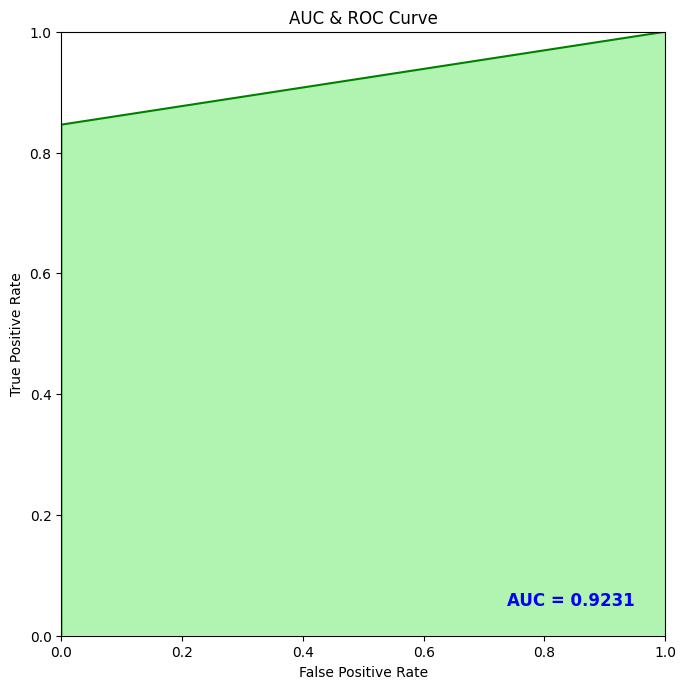

In [24]:
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()